In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from sklearn import metrics
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('amazon_items_full.csv')
df

,name,asin,price,reviews_num,rating,age,description,link,category,brand,price_range,age_range,good_reviews,bad_reviews
0,Toniebox Starter Set Red with Creative Tonie,B07HBDNGHC,78.00,20439,4.8,3.0,listening games,https://www.amazon.de/dp/B07HBDNGHC,Boomboxes & MP3-Players,tonies,expensive,Toddlers,Auf die Funktion der Box gehe ich nur kurz ein...,Wenn man sich mittlerweile im Bekanntenkreis u...
1,PlayDoh modelling Clay,B07MV3DYGJ,12.59,47928,4.8,3.0,art,https://www.amazon.de/dp/B07MV3DYGJ,Kids' Art Clay & Dough,PlayDoh,cheap,Toddlers,Es gibt wohl keine bessere Knete als die von p...,Leider sind im Gegensatz zu der Produktbeschre...
2,Paw Patrol Fire Engine with Marshall Figure Ba...,B08T1VJ2L5,9.49,15200,4.6,3.0,Marshalls basic vehicle with individual movabl...,https://www.amazon.de/dp/B08T1VJ2L5,Play Figure Playsets,Paw Patrol,cheap,School age,Ein Weihnachtsgeschenk das unterm Baum liegen ...,kein Kommentar
3,tonies Toniebox Christmas Songs Rolf Zuckowski...,B08LSDKWRW,11.99,2077,4.9,3.0,Audio play Toniebox accessories the most popu...,https://www.amazon.de/dp/B08LSDKWRW,Boomboxes & MP3-Players,tonies,cheap,Toddlers,"Tolle Lieder, die wir schon vor 30 Jahren kann...",Die tonie war offenHätte mir mehr die Klassike...
4,Allnew Fire HD 8 Kids Pro tablet 8inch HD dis...,B09BG3FFD1,84.99,26,4.2,6.0,Fire HD 8 Kids ProTablet,https://www.amazon.de/dp/B09BG3FFD1,Amazon devices,Allnew Fire,expensive,School age,"Direkt bewerten kann ich noch nichts, da es si...",Am Tablet gibt es hardwaremässig nichts auszus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Pokemon Cards 30 Different with 1 x Holo 1 x R...,B09YH9P4CF,6.50,286,4.6,14.0,Cards are packaged in a gift foil sleeve with ...,https://www.amazon.de/dp/B09YH9P4CF,Single Cards,Pokemon,cheap,Teenagers,Wie versprochen ist immer mind. 1 ganz tolle K...,"Pro: Nagelneue Karten, sichere Verpackung, der..."
396,PlayDoh Kitchen Creations Large Ice Cream Trol...,B09D5Y2WCY,94.90,136,4.6,3.0,A really cool play set this large ice cream tr...,https://www.amazon.de/dp/B09D5Y2WCY,Kids' Art Clay & Dough,PlayDoh,expensive,Toddlers,kein Kommentar,Youngest granddaughter's 4th birthday. She was...
397,KOSMOS Solar Bots Build 8 Solar Models Robot K...,B08T21B6P2,19.99,455,4.1,8.0,Cool action with the power of the sun Solar bo...,https://www.amazon.de/dp/B08T21B6P2,Learning & Education,KOSMOS,middle-priced,School age,Tolles GeschenkSuper GeschenkDer Zusammenbau i...,Unser Enkel ist 9 Jahre und technisch sehr int...
398,tonies Audio Figures for Toniebox Favourite Ch...,B09J5BJWY5,15.21,286,4.7,3.0,Cool animal songs,https://www.amazon.de/dp/B09J5BJWY5,Boomboxes & MP3-Players,tonies,middle-priced,Toddlers,War ein Geschenk 🎁 und ist super bei dem klein...,Die Figur ist herunter gafallen und klackert n...


In [3]:
df.isnull().sum().sort_values(ascending=False)

bad_reviews     1
name            0
asin            0
price           0
reviews_num     0
rating          0
age             0
description     0
link            0
category        0
brand           0
price_range     0
age_range       0
good_reviews    0
dtype: int64

In [4]:
df["bad_reviews"].fillna("kein Kommentar", inplace = True)

### Visualization


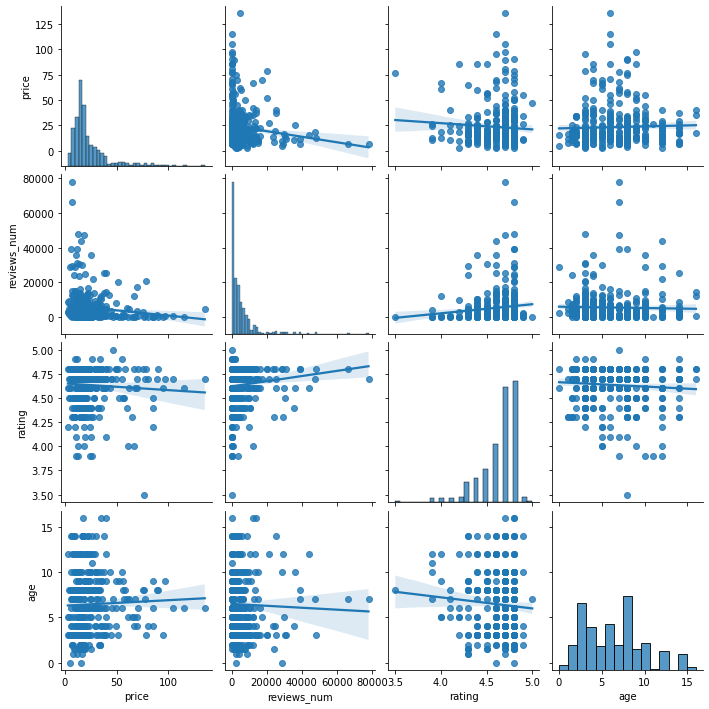

In [5]:
sns.pairplot(df, kind = 'reg')

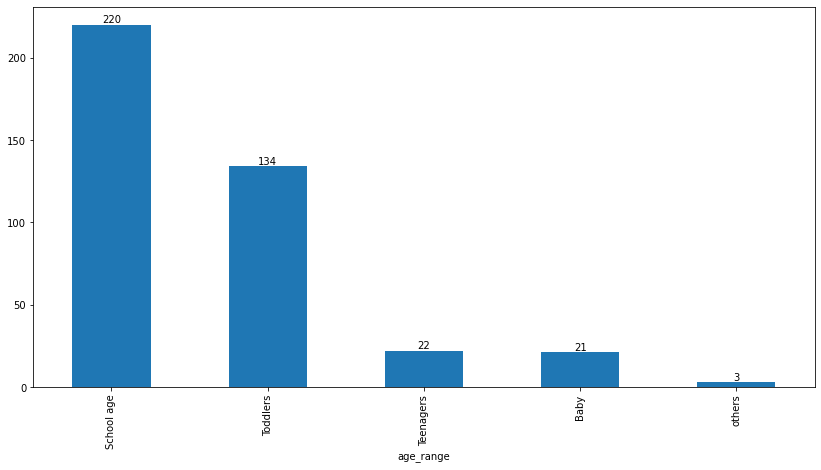

In [6]:
# age group distribution
ax = df.groupby(['age_range']).size().sort_values(ascending=False).plot.bar(figsize=(14,7))
ax.bar_label(ax.containers[0]);

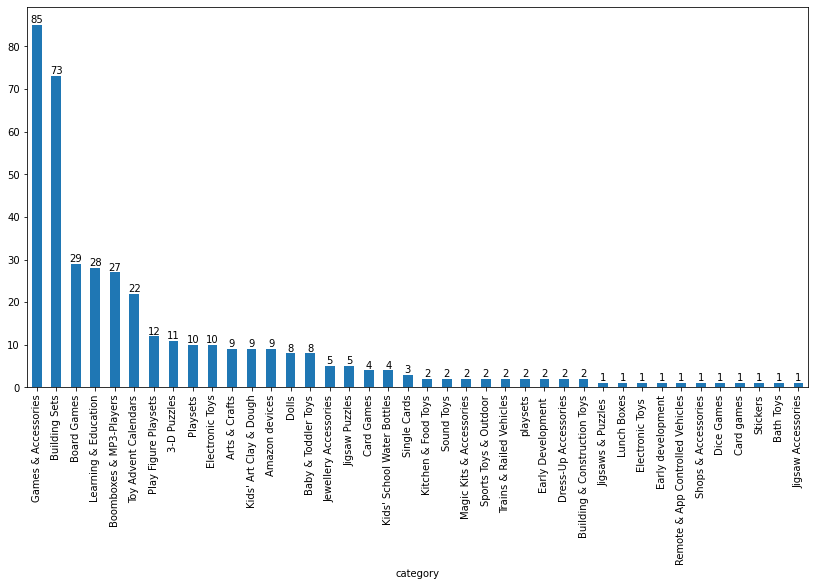

In [7]:
# categories distribution
ax = df.groupby(['category']).size().sort_values(ascending=False).plot.bar(figsize=(14,7))
ax.bar_label(ax.containers[0]);

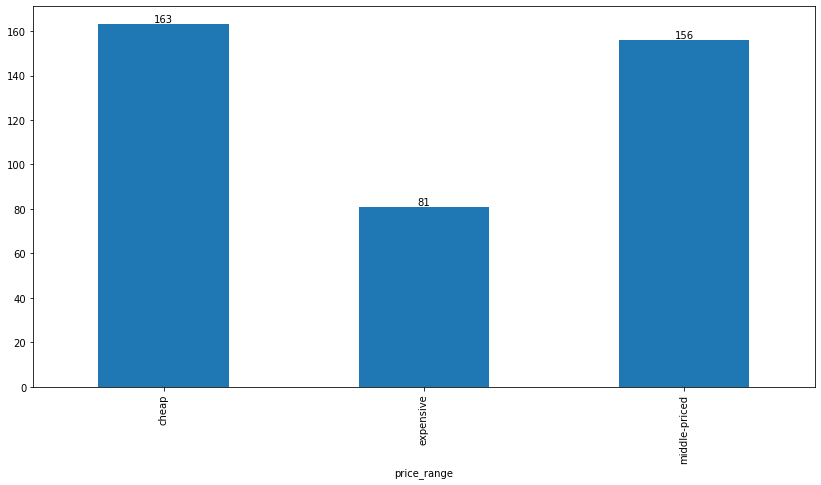

In [8]:
# price distribution
ax = df.groupby(['price_range']).size().plot.bar(figsize=(14,7))
ax.bar_label(ax.containers[0]);

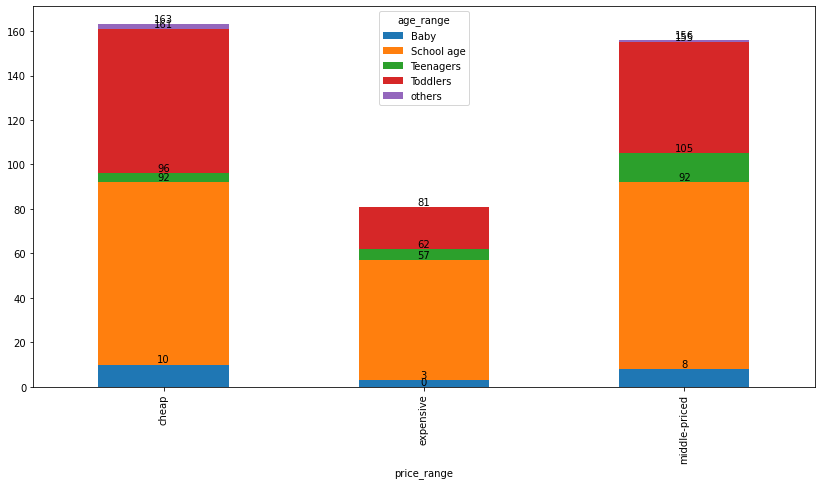

In [9]:
ax = df.groupby(['price_range','age_range']).size().unstack().plot(figsize=(14,7),kind='bar', stacked=True)
for container in ax.containers:
    ax.bar_label(container)

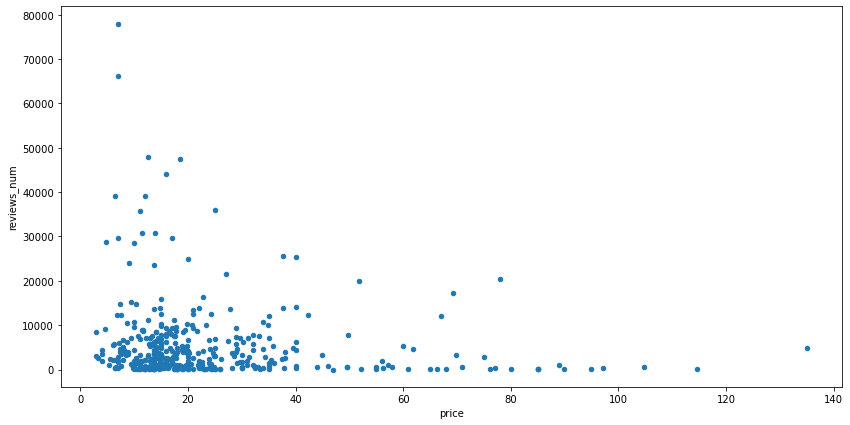

In [10]:
# price and reviews relation
df[['price','reviews_num']].plot.scatter('price','reviews_num',figsize=(14,7));

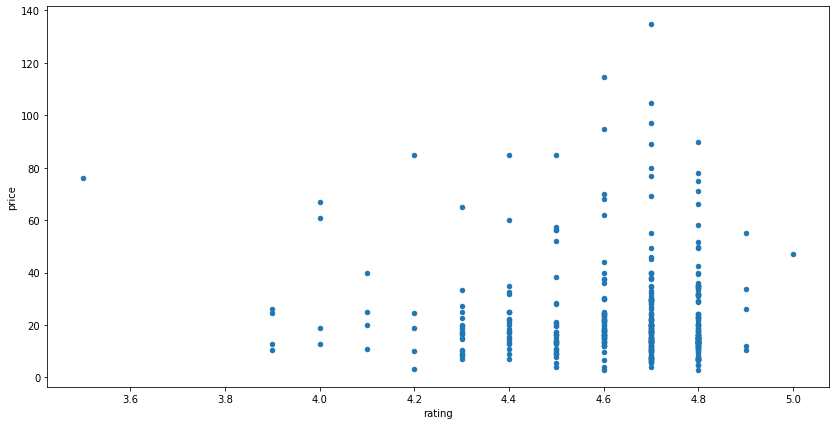

In [11]:
df[['price','rating']].plot.scatter('rating','price',figsize=(14,7));

In [12]:
df.columns

Index(['name', 'asin', 'price', 'reviews_num', 'rating', 'age', 'description',
       'link', 'category', 'brand', 'price_range', 'age_range', 'good_reviews',
       'bad_reviews'],
      dtype='object')

In [13]:
cat_cols = ['category', 'brand', 'price_range', 'age_range']
num_cols = ['price', 'reviews_num', 'age', 'rating']

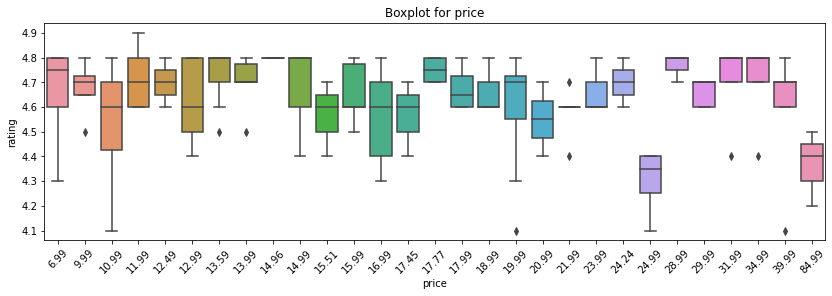

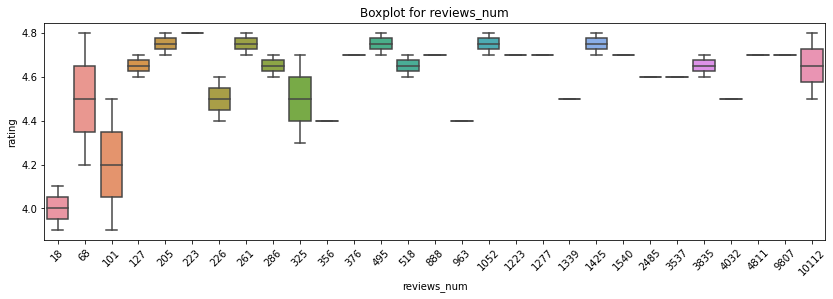

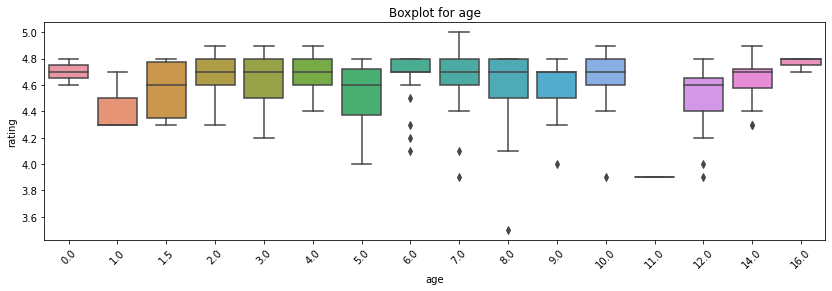

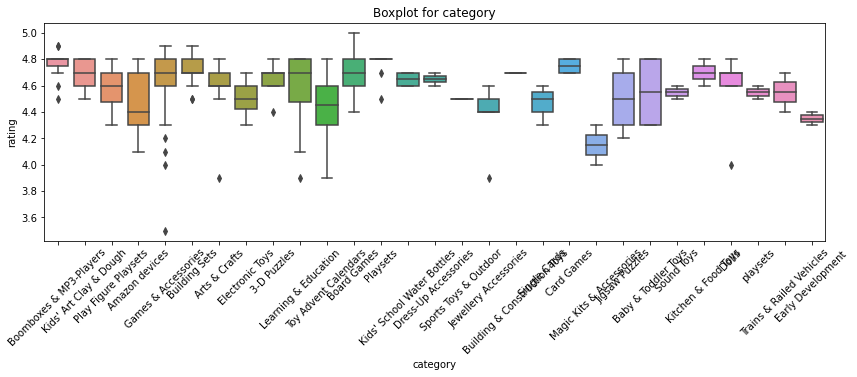

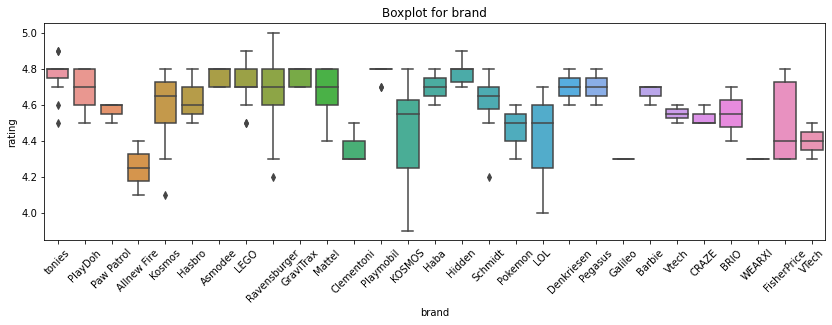

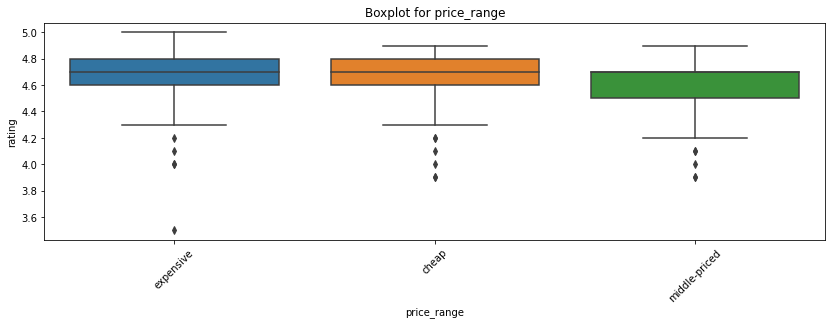

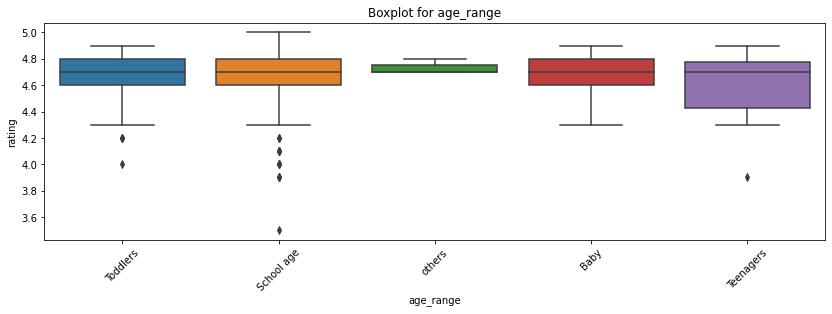

In [14]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='rating',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:29])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
variables = ['price', 'reviews_num', 'age', 'category', 'brand', 'price_range', 'age_range']

for col in variables:
    get_boxplot(col)

In [15]:
df.columns


Index(['name', 'asin', 'price', 'reviews_num', 'rating', 'age', 'description',
       'link', 'category', 'brand', 'price_range', 'age_range', 'good_reviews',
       'bad_reviews'],
      dtype='object')

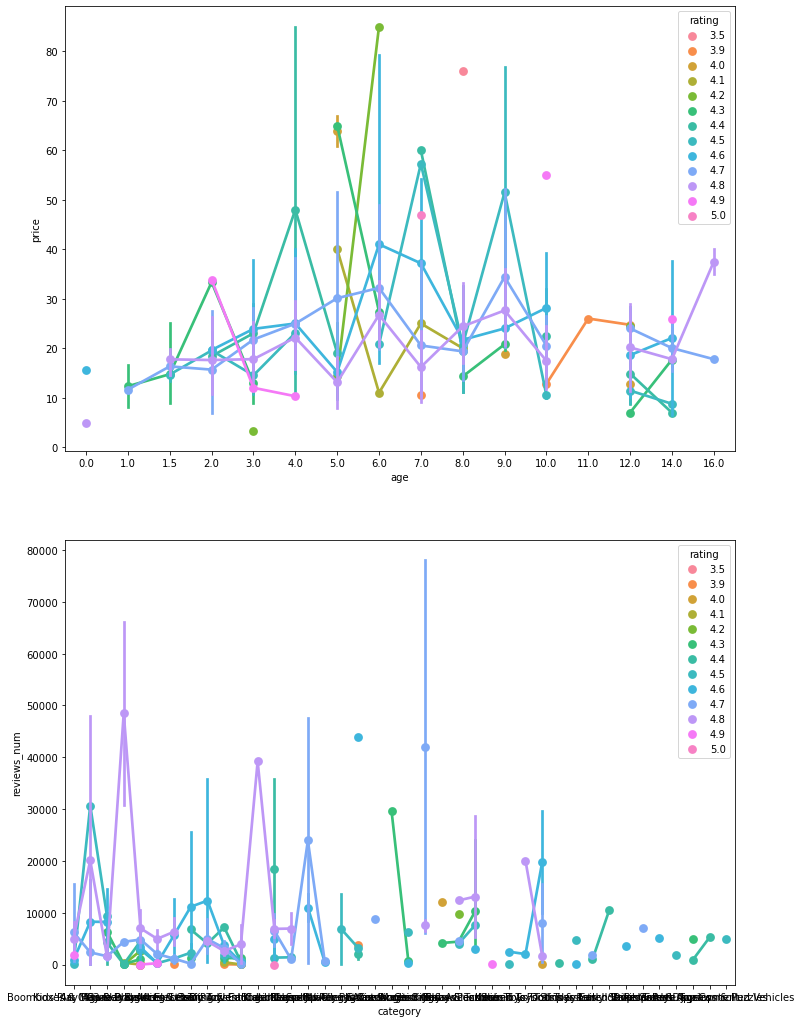

In [16]:
figure, axes = plt.subplots(nrows=2)
figure.set_size_inches(12, 18)

sns.pointplot(x='age', y='price', data=df, hue='rating', ax=axes[0])
sns.pointplot(x='category', y='reviews_num', data=df, hue='rating', ax=axes[1]);

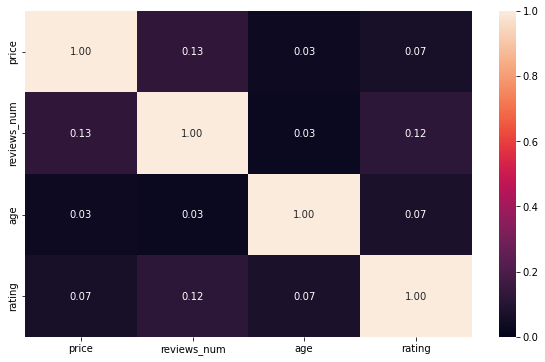

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f");

In [18]:
# Function to compare charts of row data and their logarithms
def val_log_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(df[col], rwidth=0.9, alpha=0.7, bins=15)
    ax[0].set_title(col)
    ax[1].hist(np.log(df[col]+1), rwidth=0.9, alpha=0.7, bins=15)
    ax[1].set_title('log of '+col)
    plt.show()

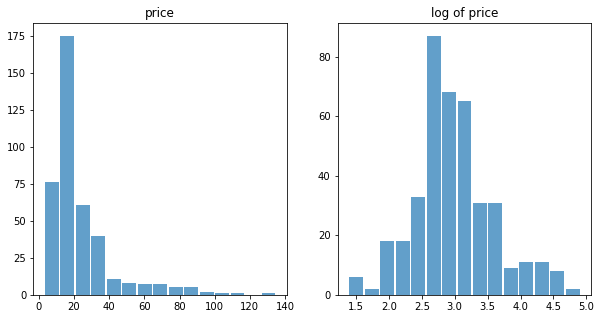

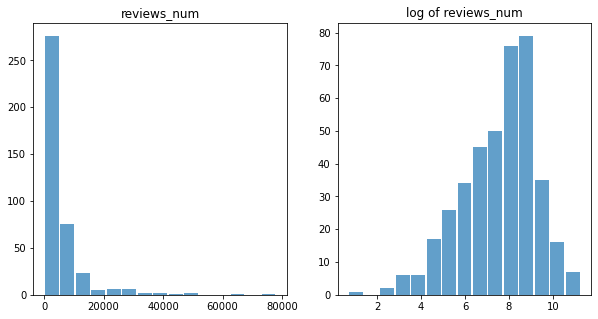

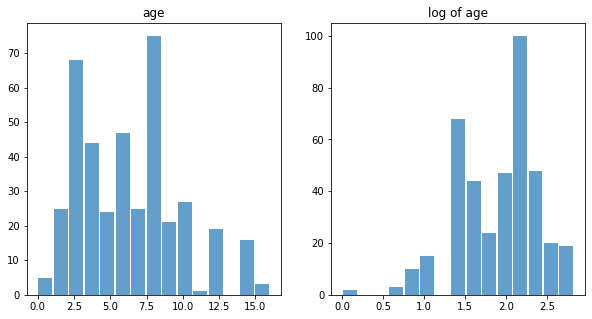

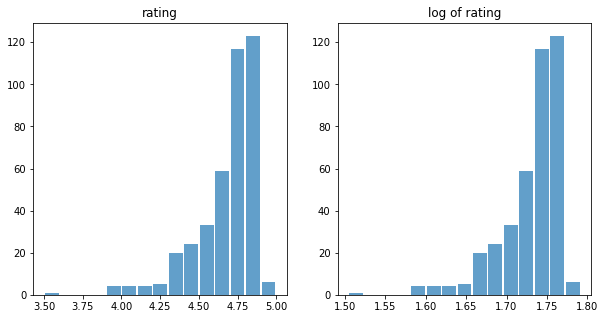

In [19]:
for col in num_cols:
    val_log_plot(df, col)

In [20]:
# Definition of outliers
def get_outlier(df, col):
    Q3 = pd.DataFrame.quantile(df, q=0.75, axis=0, numeric_only=True, interpolation='midpoint')[col]
    Q1 = pd.DataFrame.quantile(df, q=0.25, axis=0, numeric_only=True, interpolation='midpoint')[col]
    IQR = round(Q3-Q1,1)
    return df[~df[col].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)][col], Q1 - 1.5*IQR, Q3 + 1.5*IQR


# Summary of outliers
def show_info(df, col, show=True):
    # Qty and boarders of outliers
    out, lim1, lim2 = get_outlier(df, col)
    minCol = df[col].min()
    maxCol = df[col].max()
    median = df[col].median()
    nulCol = sum(pd.isnull(df[col]))
    
    cnt = min(int(df[col].value_counts().count()),2000)
    
    if show:
        print('Not filled: ', nulCol)
        print('Min: ', minCol)
        print('Max: ', maxCol)
        print('Median: ', median)
        print('Qty outliers: ', len(out))
        if len(out) > 0:
            print('Bottom line: ', lim1)
            print('Upper line: ', lim2)

        # histogram and boxplot
        fig, axes = plt.subplots(1,2,figsize=(12,4))
        axes[0].hist(df[col], bins=cnt)
        axes[1].boxplot(df[col])
    
    return {'med': median, 'lm1': lim1, 'lm2': lim2}

In [21]:
df.columns

Index(['name', 'asin', 'price', 'reviews_num', 'rating', 'age', 'description',
       'link', 'category', 'brand', 'price_range', 'age_range', 'good_reviews',
       'bad_reviews'],
      dtype='object')

Not filled:  0
Min:  3.5
Max:  5.0
Median:  4.7
Qty outliers:  18
Bottom line:  4.3
Upper line:  5.1


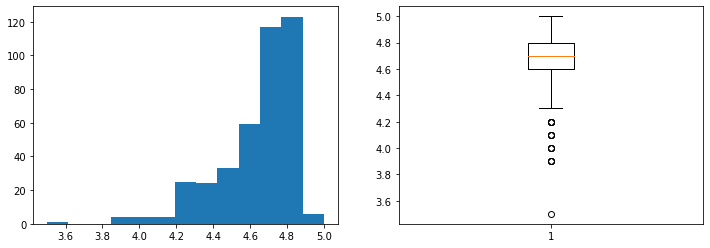

In [22]:
d = show_info(df, 'rating')

In [23]:
for column in cat_cols:
    df[column] = df[column].astype('category').cat.codes

<AxesSubplot:>

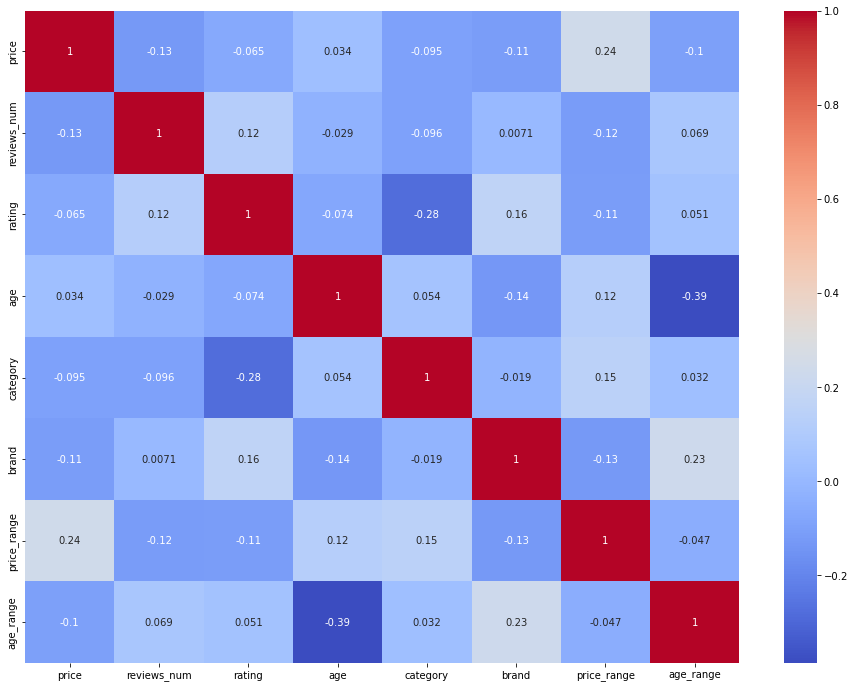

In [24]:
correlation = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

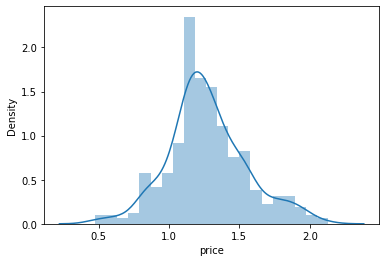

In [25]:
sns.distplot(np.log10(df['price']));

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          400 non-null    object 
 1   asin          400 non-null    object 
 2   price         400 non-null    float64
 3   reviews_num   400 non-null    int64  
 4   rating        400 non-null    float64
 5   age           400 non-null    float64
 6   description   400 non-null    object 
 7   link          400 non-null    object 
 8   category      400 non-null    int8   
 9   brand         400 non-null    int8   
 10  price_range   400 non-null    int8   
 11  age_range     400 non-null    int8   
 12  good_reviews  400 non-null    object 
 13  bad_reviews   400 non-null    object 
dtypes: float64(3), int64(1), int8(4), object(6)
memory usage: 32.9+ KB


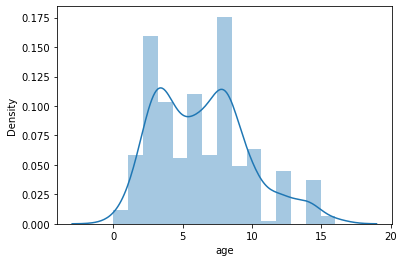

In [27]:
sns.distplot(df['age']);

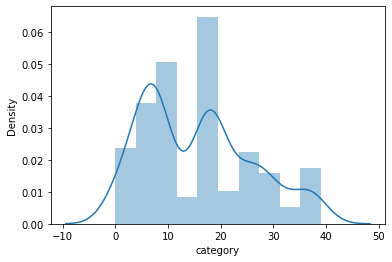

In [28]:
sns.distplot(df["category"]);

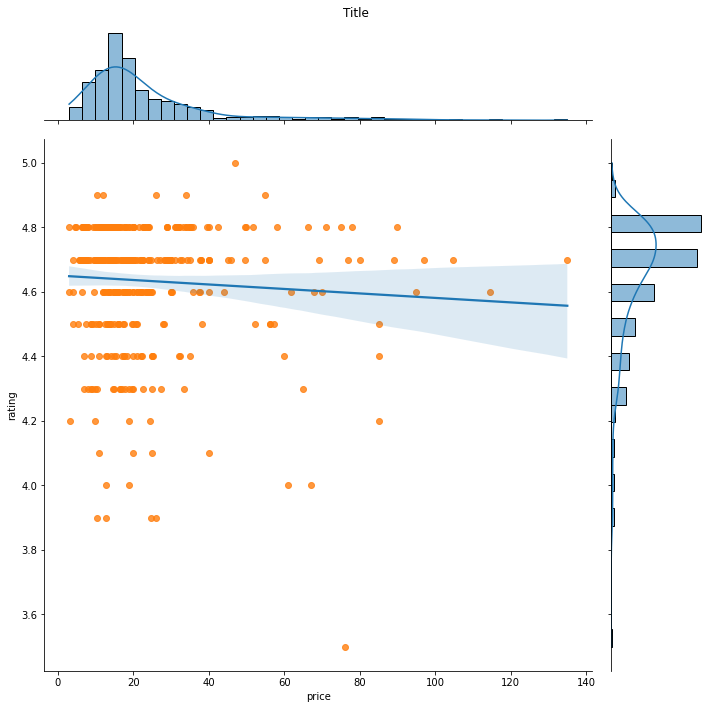

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

kk =sns.color_palette()

ax = sns.jointplot(data=df, x='price', y='rating', height=10, 
                   kind="reg", scatter_kws={"color": kk[1]}, line_kws={"color": kk[0]});
plt.suptitle("Title");
plt.subplots_adjust(top=0.95)

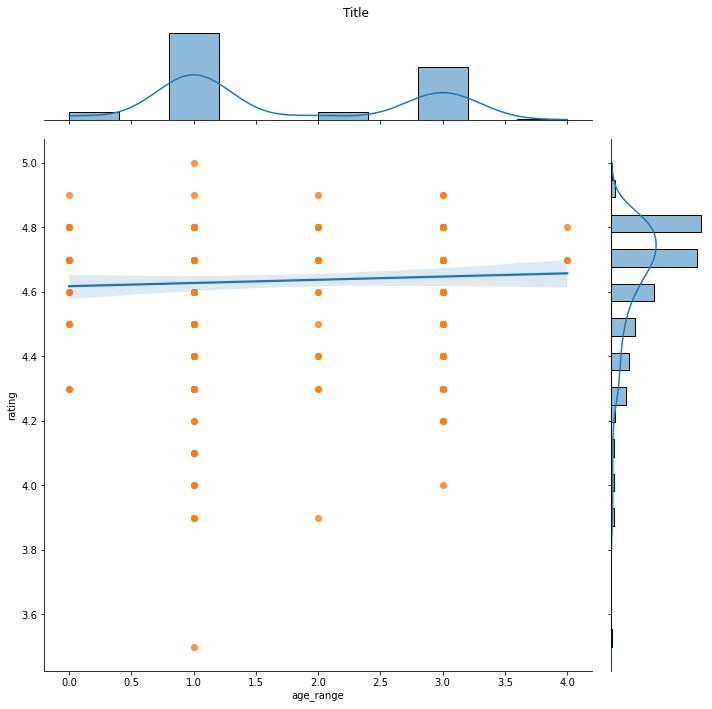

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

kk =sns.color_palette()

ax = sns.jointplot(data=df, x='age_range', y='rating', height=10, 
                   kind="reg", scatter_kws={"color": kk[1]}, line_kws={"color": kk[0]});
plt.suptitle("Title");
plt.subplots_adjust(top=0.95)

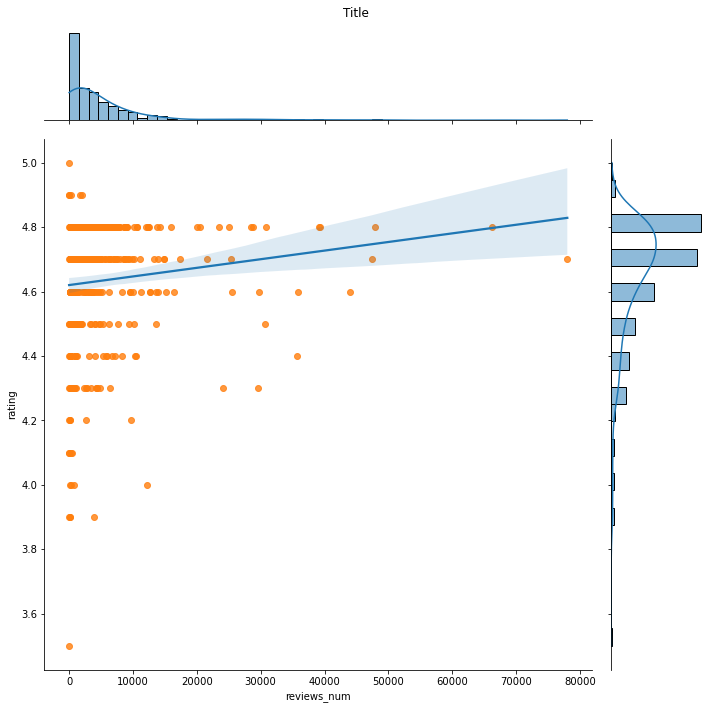

In [31]:
ax = sns.jointplot(data=df, x='reviews_num', y='rating', height=10, 
                   kind="reg", scatter_kws={"color": kk[1]}, line_kws={"color": kk[0]});
plt.suptitle("Title");
plt.subplots_adjust(top=0.95)

### ANOVA (significance of features)

In [32]:
cat_cols = ['category', 'brand', 'price_range', 'age_range']
new_num_cols = ['price', 'reviews_num', 'age']

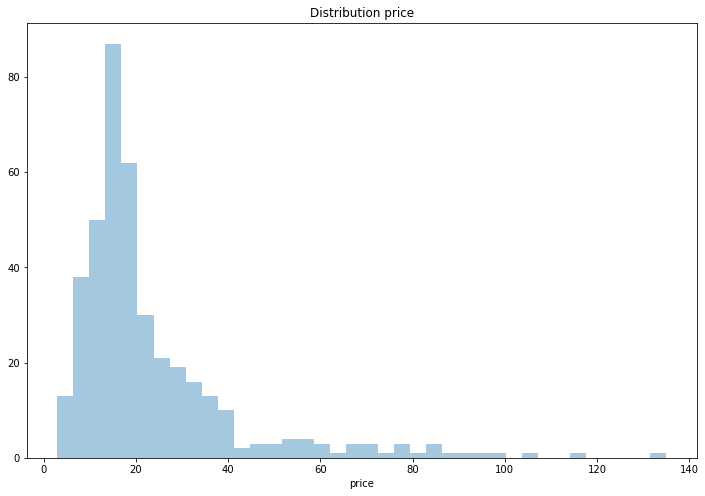

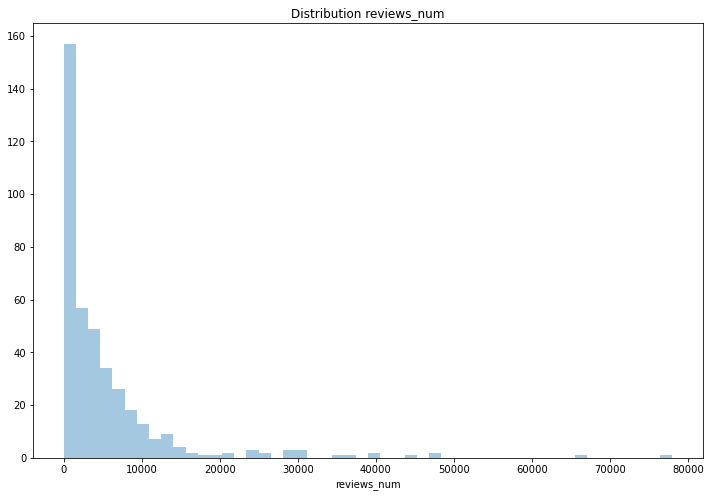

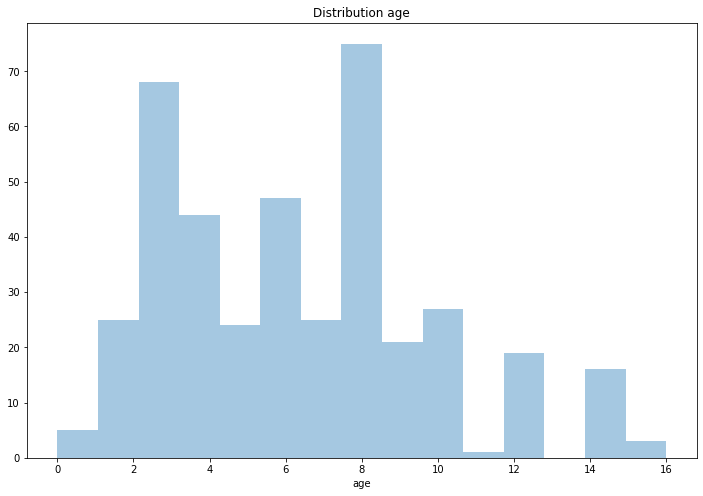

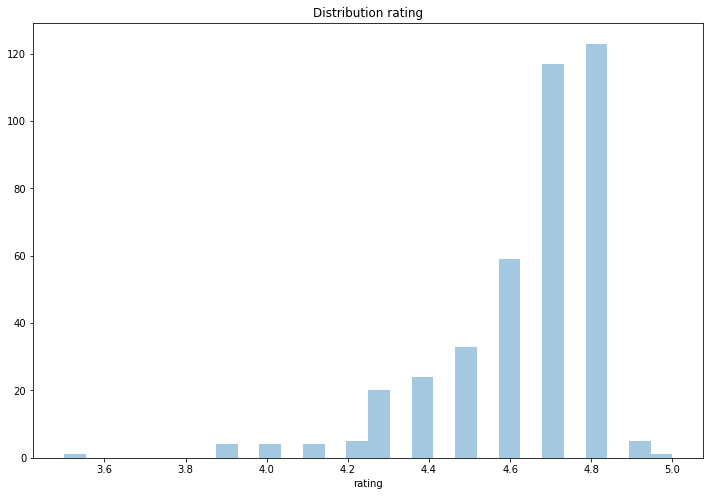

In [33]:
for col in num_cols:
    plt.figure()
    plt.title(f"Distribution {col}")
    sns.distplot(df[col], kde=False)

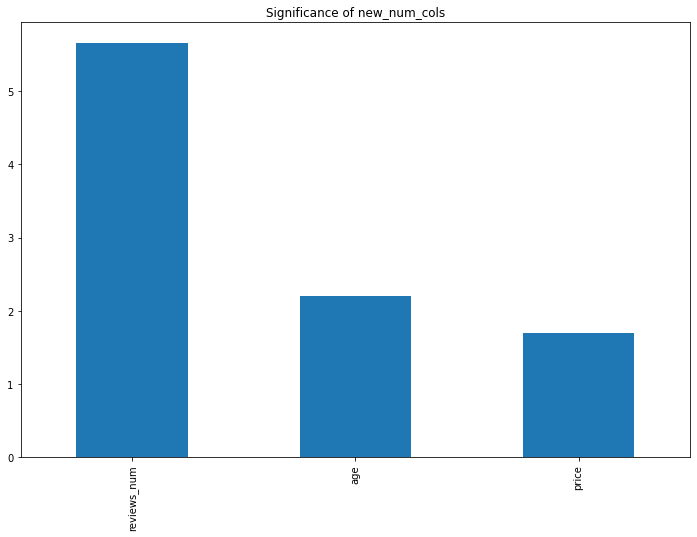

In [34]:
# ANOVA analysis
imp_num = pd.Series(f_regression(df[new_num_cols], df["rating"])[0],
                    index=new_num_cols)
imp_num.sort_values(inplace=True, ascending=False)
imp_num.plot(kind="bar")
plt.title('Significance of new_num_cols');

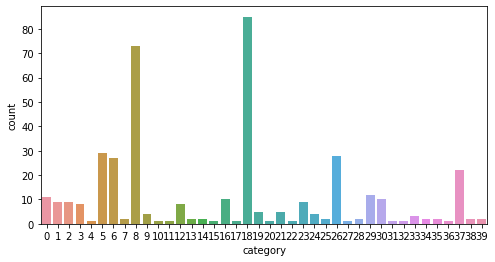

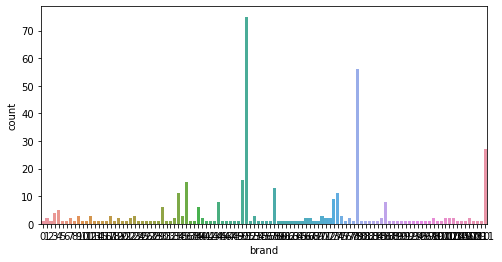

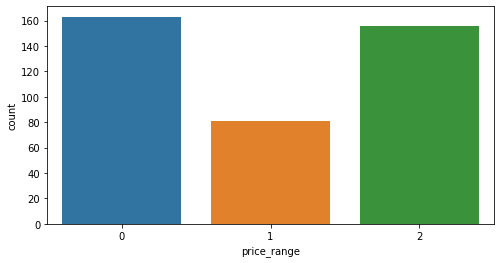

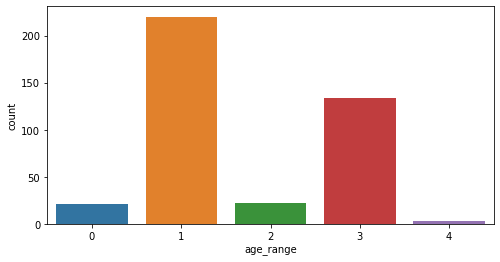

In [35]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(df[col])

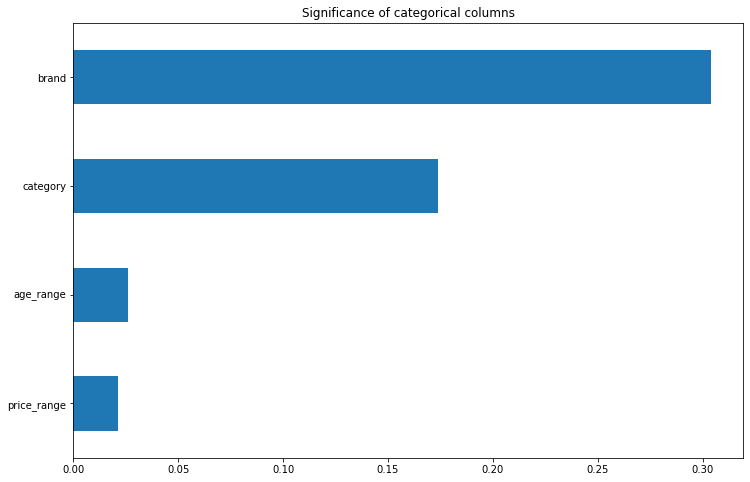

In [36]:
# significance of features
imp_cat = pd.Series(mutual_info_regression(pd.concat([df[cat_cols]],
                                                     axis=1),
                                           df['rating'],
                                           discrete_features=True),
                    index=pd.concat([df[cat_cols]], axis=1).columns)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')
plt.title('Significance of categorical columns');

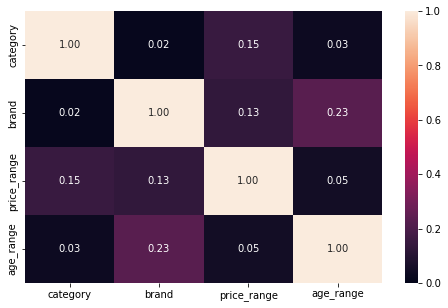

In [37]:
# correlation of features
plt.figure(figsize=(8, 5))
sns.heatmap(df[cat_cols].corr().abs(),
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f");